In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "C:\\Users\\\Trevor\\Downloads\\abalone.data"
abalone = pd.read_csv(path, header = None)
with open("C:\\Users\\\Trevor\\Downloads\\abalone.names") as f:
    print(f.read())

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

### About dataset
According to abalone.names file, this dataset is about abalone's age and their physical metrics. The abalone.data data set includes details of 4177 abalones. It includes following fields:


   Name          | Data Type | Meas. |	Description 
   --------------|-----------|-------|-----------------------------
   Sex		     | nominal	 |		 | M, F, and I (infant)
   Length		 | continuous| mm    | Longest shell measurement
   Diameter      | continuous| mm    | perpendicular to length
   Height	     | continuous| mm    | with meat in shell
   Whole weight  | continuous| grams | whole abalone
   Shucked weight| continuous| grams | weight of meat
   Viscera weight| continuous| grams | gut weight (after bleeding)
   Shell weight  | continuous| grams | after being dried
   Rings	     | integer	 |	     | +1.5 gives the age in years
   
 

### Data pre-process and visualization
We first rename the colume from the information given in the `abalone.names` file and add an `Age` colume.

In [3]:
abalone.rename(columns={0: 'Sex', 1: 'Length', 2: 'Diameter', 
                        3: 'Height', 4: 'Whole-weight', 5: 'Shucked-weight', 
                        6: 'Viscera-weight', 7: 'Shell-weight', 8: 'Rings'}, inplace=True)
abalone['Age'] = abalone['Rings'] + 1.5
abalone.head()

,Sex,Length,Diameter,Height,Whole-weight,Shucked-weight,Viscera-weight,Shell-weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Now we use one hot encoding to convert categorical variable `Sex` into dummy variables.

In [4]:
abalone.groupby(['Sex']).size()

Sex
F    1307
I    1342
M    1528
dtype: int64

In [5]:
abalone = pd.concat([abalone, pd.get_dummies(abalone['Sex'])], axis = 1)
abalone.describe()

,Length,Diameter,Height,Whole-weight,Shucked-weight,Viscera-weight,Shell-weight,Rings,Age,F,I,M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Count'>

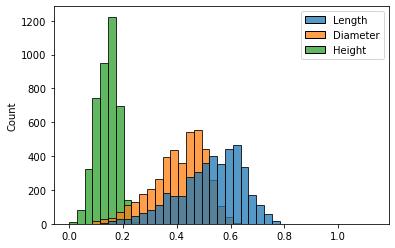

In [6]:
sns.histplot(data=abalone.loc[:,('Length', 'Diameter', 'Height')])

<AxesSubplot:>

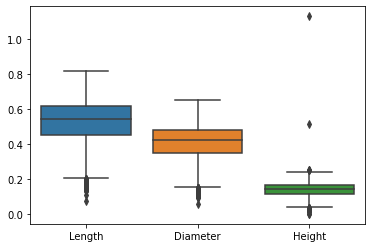

In [7]:
sns.boxplot(data=abalone.loc[:,('Length', 'Diameter', 'Height')])

We can see that Height category is right-skewed, we should clean our data by getting rid of these outliers

<AxesSubplot:>

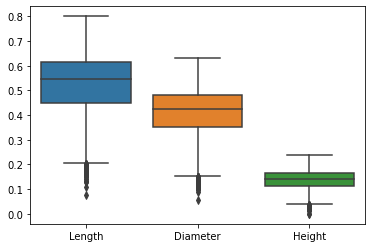

In [8]:
abalone = abalone[abalone['Height'] < 0.25]
sns.boxplot(data=abalone.loc[:,('Length', 'Diameter', 'Height')])

<AxesSubplot:ylabel='Count'>

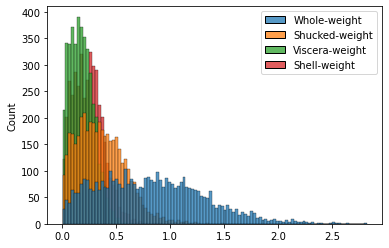

In [9]:
sns.histplot(data=abalone.loc[:,('Whole-weight', 'Shucked-weight', 'Viscera-weight', 'Shell-weight')])

<AxesSubplot:>

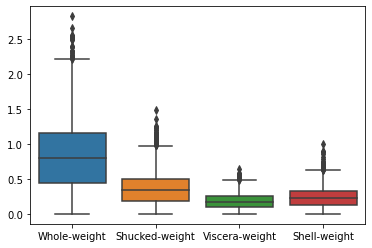

In [10]:
sns.boxplot(data=abalone.loc[:,('Whole-weight', 'Shucked-weight', 'Viscera-weight', 'Shell-weight')])

Since all the weight features have the same right-skewed pattern and there are no obvious outliner spotted in the box plot, 
we do not have to make adjustment here.

### Feature selection

#### Correlation analysis

<AxesSubplot:>

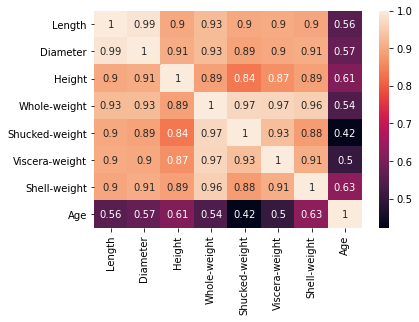

In [11]:
candidates = abalone[['Length', 'Diameter', 'Height', 'Whole-weight', 'Shucked-weight', 
                   'Viscera-weight', 'Shell-weight', 'Age']]
sns.heatmap(abalone[['Length', 'Diameter', 'Height', 'Whole-weight', 'Shucked-weight', 
                   'Viscera-weight', 'Shell-weight', 'Age']].corr(), annot = True)

We now calculate variance inflation factor for each feature listed above to check the existence of multicollinearity.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = ['Length', 'Diameter', 'Height', 'Whole-weight', 'Shucked-weight', 
                   'Viscera-weight', 'Shell-weight', 'Age']
vif["VIF"] = [variance_inflation_factor(candidates.values, i) for i in range(candidates.shape[1])]

In [13]:
vif

,variables,VIF
0,Length,707.314522
1,Diameter,761.709548
2,Height,94.719776
3,Whole-weight,432.855597
4,Shucked-weight,117.117748
5,Viscera-weight,65.097298
6,Shell-weight,82.934621
7,Age,27.610391


We can see that Whole weight has high correlations with Shucked, Viscera and Shell weight. And Diameter also has a very high correlation with Length. They also have significantly high vifs. And Diameter also has a very high correlation with Length. To eliminate multicollinearity, we will remove Whole weight and Diameter from our features.

In [14]:
feature = abalone[['Length', 'Height', 'Shucked-weight', 
                   'Viscera-weight', 'Shell-weight', 'F', 'I', 'M']]
X = feature.values
X[0:5]

array([[0.455 , 0.095 , 0.2245, 0.101 , 0.15  , 0.    , 0.    , 1.    ],
       [0.35  , 0.09  , 0.0995, 0.0485, 0.07  , 0.    , 0.    , 1.    ],
       [0.53  , 0.135 , 0.2565, 0.1415, 0.21  , 1.    , 0.    , 0.    ],
       [0.44  , 0.125 , 0.2155, 0.114 , 0.155 , 0.    , 0.    , 1.    ],
       [0.33  , 0.08  , 0.0895, 0.0395, 0.055 , 0.    , 1.    , 0.    ]])

And here is our label

In [15]:
y = abalone['Age'].values
y[0:5]

array([16.5,  8.5, 10.5, 11.5,  8.5])

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2920, 8) (2920,)
Test set: (1252, 8) (1252,)


In [18]:
reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
reg.coef_

array([  5.59987645,  26.06472966, -10.89844825,  -2.86072933,
        19.74014287,   0.21082634,  -0.56025871,   0.34943237])

In [19]:
reg.score(X_train, y_train)

0.5312121909704657

It is clearly to us that our model performs poorly, here is the analysis

### Analysis
##### multicollinearity

<AxesSubplot:>

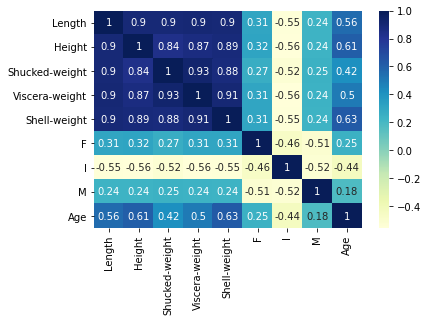

In [20]:
sns.heatmap(abalone[['Length', 'Height', 'Shucked-weight', 
                   'Viscera-weight', 'Shell-weight', 'F', 'I', 'M','Age']].corr(), cmap="YlGnBu", annot = True)

We can see that except Sex, all other features have relatively high correlation (around 0.9). Even though we removed Whole weight and Diameter, multicollinearity still exists. Therefore from the first five, we pick two features which are mostly correlate to Age. These two are Shell weight (0.63) and Height (0.61). And then we will look into sex features.

##### Shell weight & Height
From the age section, we can see that age have relatively high correlation with shell weight and height. We now visualize their relationship

<AxesSubplot:xlabel='Shell-weight', ylabel='Age'>

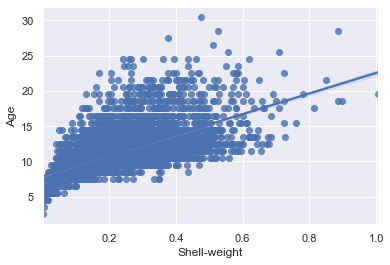

In [21]:
sns.set_theme(color_codes=True)
sns.regplot(x = 'Shell-weight', y = 'Age', data=abalone)

<AxesSubplot:xlabel='Height', ylabel='Age'>

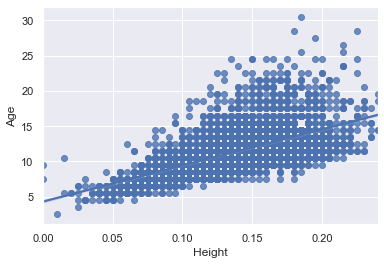

In [22]:
sns.regplot(x = 'Height', y = 'Age', data=abalone)

##### Sex
Since we can see that all three sex have small correlation with other predictors, we now plot their relationship with two insightful features Shell weight and height.

<AxesSubplot:xlabel='Shell-weight', ylabel='Count'>

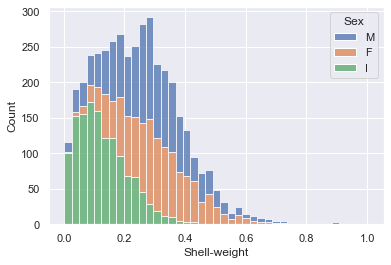

In [23]:
sns.histplot(data=abalone, x = abalone['Shell-weight'], hue = 'Sex', multiple="stack")

We can conclude that male tends to have weight more on shell than female and adults tends to weight more on shell than infant.

<AxesSubplot:xlabel='Height', ylabel='Count'>

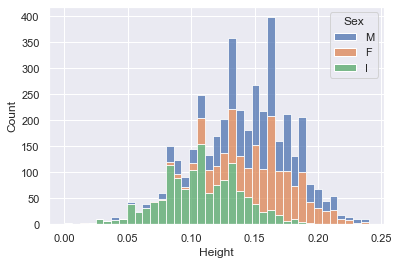

In [24]:
sns.histplot(data=abalone, x = abalone['Height'], hue = 'Sex', multiple="stack")

This implies adults tends to be higher than infant.

##### Putting insightful features together

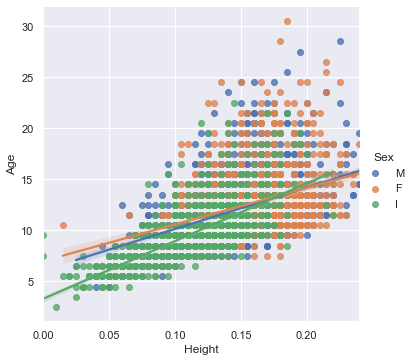

In [25]:
sns.lmplot(data=abalone, x='Height', y='Age', hue='Sex', fit_reg=True)

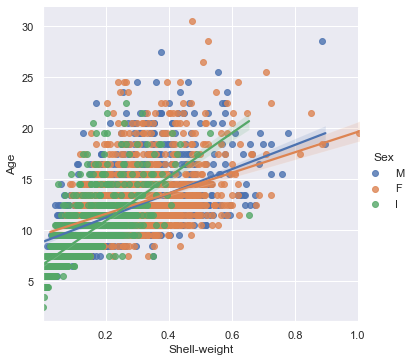

In [26]:
sns.lmplot(data=abalone, x='Shell-weight', y='Age', hue='Sex', fit_reg=True)

From above two regression plot, we can clearly see the impact of these five features on Ages. Among infants, as height increases, their ages increases more than adults. And among adults, male's age tends to increase more than female as height increases. And it is the same case for Shell weight.

### Mixed Effects Approach

We can potentially improve our linear model by implementing a mixed-effect model

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import r2_score

In [28]:
abalone.rename(columns={'Shell-weight': 'Shell'}, inplace=True)
md = smf.mixedlm("Age ~ Height + Shell", abalone, groups=abalone["Sex"])

In [29]:
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Age       
No. Observations: 4172    Method:             REML      
No. Groups:       3       Scale:              6.0843    
Min. group size:  1304    Log-Likelihood:     -9689.6699
Max. group size:  1526    Converged:          Yes       
Mean group size:  1390.7                                
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      6.878    0.328 20.943 0.000  6.234  7.521
Height        17.424    2.212  7.878 0.000 13.089 21.759
Shell          8.910    0.606 14.703 0.000  7.722 10.097
Group Var      0.196    0.082                           



C:\Users\Trevor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

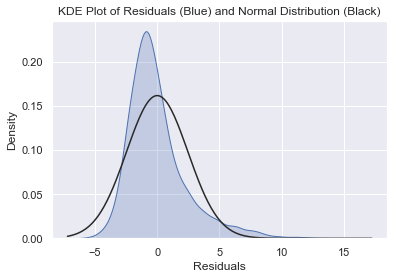

In [32]:
ax = sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
ax.set_title("KDE Plot of Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [31]:
y_true = abalone['Age'].values
y_pred = mdf.predict(abalone[['Shell','Height','Sex']]).values
r2_score(y_true, y_pred)

0.402956342859797

From above results and the kernal plot, we can see that the Height and Shell's coefficients are significant and the group variance is small. However, according to our r2-score, the model still performs poorly. In the future, we might consider using non-linear regression or random feature approach. We can also use classfication model and spare ages into many different group (age intervals). And we can predict the age by checking whether it fell into a certain age interval.